In [5]:
from ipynb.fs.full.koselleck import *
w='culture'

In [10]:
# !pip install jupyter_dash dash_bootstrap_components

In [11]:
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
from dash_table import DataTable, FormatTemplate
import plotly.express as px
import plotly.io as pio
pio.templates.default='simple_white'
px.defaults.template='simple_white'

In [12]:
def plot_historical_semantic_distance_matrix_px(w,**y):
    df=distmat(w,**y)
    fig = go.Figure(data=go.Heatmap(z=df, x=df.index, y=df.columns, colorscale='gray',reversescale=True))
    fig.update_layout(title=f'Historical-semantic distance matrix for the word "{w}"',
                     width=800,height=800)
    return fig

In [ ]:
plot_historical_semantic_distance_matrix_px(w)

[Koselleck] (21:01:29) Connecting (+163.9s)
Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/ryan/miniconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/ryan/miniconda3/lib/python3.8/site-packages/sqlitedict.py", line 396, in run
    conn.execute('PRAGMA journal_mode = %s' % self.journal_mode)
sqlite3.OperationalError: database is locked


## Neighbor line chart

In [5]:
figdf_nbr = plot_nbrs(w,max_rank=25,max_rank1=5,returndata=True,ybin=20)
figdf_nbr['period']=[int(y[:4]) for y in figdf_nbr['period']]
# figdf_nbr

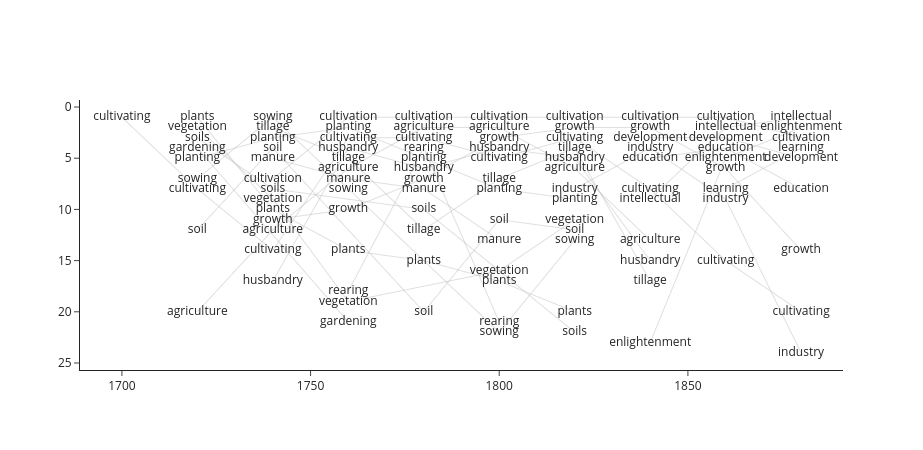

In [6]:
fig1 = px.scatter(figdf_nbr, x='period', y='rank', text='neighbor',opacity=0)
fig2 = px.line(figdf_nbr, x='period', y='rank',line_group='neighbor')
fig2.update_traces(line=dict(color="silver", width=0.5))
fig3=go.Figure(data=fig2.data + fig1.data)
fig3.update_yaxes(autorange='reversed')
fig3

In [7]:
# figdf_nbr

In [8]:
# with open('assets/style.css','w') as of:
#     of.write('''
# body { font-family: monospace}
         
             
#     ''')
    

In [9]:
#get_tilts_sattelzeit(w)

In [10]:
# Build App
app = JupyterDash(__name__,external_stylesheets=[dbc.themes.GRID])

app.layout = dbc.Container([
    dbc.Row(
        html.H1("JupyterDash Demo"),
    ),
    dbc.Row(
        dcc.Input(id="word", type="text", value='culture', placeholder="culture", debounce=True),
    ),
    dbc.Row(
        [
            dbc.Col(
                html.Div([
                    html.H3('Graph 1'),
                    dcc.Graph(id='graph1'),
                ]),
#                 width=6
            ),
            dbc.Col(
                html.Div([
                    html.H3('Graph 2 '),
                    dcc.Graph(id='graph2'),
                ]),
#                 width=6
            )
        ]
    ),
    dbc.Row(
        DataTable(
            id='dfcr',
            data=[],
            filter_action="native",
            sort_action="native",
#             sort_mode="multi",
#             column_selectable="single",
#             row_selectable="multi",
#             row_deletable=True,
            selected_columns=[],
            selected_rows=[],
            page_action="native",
            page_current= 0,
            page_size=25,
        )
    )
],fluid=True)


    

# Define callback to update graph
@app.callback(Output('graph1', 'figure'),Input("word", "value"))
def update_figure1(word):
    o=plot_historical_semantic_distance_matrix_px(word)
    return o

@app.callback(Output('graph2', 'figure'),Input("word", "value"))
def update_figure2(word):
    o=plot_historical_semantic_distance_matrix_px('culture')
    return o


@app.callback(
    [Output("dfcr", "data"), Output('dfcr', 'columns')],
    Input("word", "value")
)
def update_dfcr(word):
    df=get_tilts_sattelzeit_word(word).reset_index()
    columns=[
        dict(
            name=col,
            id=col,
#             format=FormatTemplate.percentage(1)
        )
        for col in df.columns
    ]
    return round(df,1).to_dict('records'), columns

# Run app and display result inline in the notebook
# app.run_server(host='192.168.1.163',port=8052,debug=True)
app.run_server(mode='jupyterlab',debug=True)

In [11]:
dff=get_tilts_sattelzeit()

In [12]:
dff

1700-1770        (I)  1770-1830       (II)  \
word    vector                                                            
abandon Collective-Indiv.RH  15.625464  12.249344  27.874808  31.447740   
        Polit-Acad.HGI       97.739763  -5.800366  91.939397  -3.259766   
        Woman-Man.VG         26.445140  29.561940  56.007080   1.936550   
        Pos-Neg.HGI          37.810690   4.473437  42.284126  18.527504   
        Abs-Conc.Median      90.022652   0.243229  90.265881   6.988662   
...                                ...        ...        ...        ...   
zoo     Interp-Desc.HGI      17.982250  -9.461182   8.521067  17.834951   
        Woman-Man.VG         44.160643 -18.560306  25.600337  27.278185   
        Judg-Perc.HGI        70.359459  -0.233946  70.125514  -6.850027   
        Abs-Conc.Median      16.220231  -9.482225   6.738006  12.675150   
        Time-Space.HGI       56.765856  -1.755211  55.010645   2.085087   

                             1830-1900      (III)   abs(III)       change  \
word    vector                                                              
abandon Collective-Indiv.RH  59.322548  43.697084  43.697084  +Collective   
        Polit-Acad.HGI       88.679631  -9.060133   9.060133        +Acad   
        Woman-Man.VG         57.943630  31.498490  31.498490       +Woman   
        Pos-Neg.HGI          60.811630  23.000941  23.000941         +Pos   
        Abs-Conc.Median      97.254543   7.231891   7.231891         +Abs   
...                                ...        ...        ...          ...   
zoo     Interp-Desc.HGI      26.356018   8.373768   8.373768                
        Woman-Man.VG         52.878522   8.717879   8.717879                
        Judg-Perc.HGI        63.275486  -7.083973   7.083973                
        Abs-Conc.Median      19.413155   3.192925   3.192925                
        Time-Space.HGI       57.095732   0.329876   0.329876                

                             change_magnitude  
word    vector                                 
abandon Collective-Indiv.RH         43.697084  
        Polit-Acad.HGI               9.060133  
        Woman-Man.VG                31.498490  
        Pos-Neg.HGI                 23.000941  
        Abs-Conc.Median              7.231891  
...                                       ...  
zoo     Interp-Desc.HGI              8.373768  
        Woman-Man.VG                 8.717879  
        Judg-Perc.HGI                7.083973  
        Abs-Conc.Median              3.192925  
        Time-Space.HGI               0.329876  

[161576 rows x 9 columns]

In [13]:
# dbc.Container??

In [14]:
# app.css.append_css({'h3':{'color':'red'}})

In [15]:
# dash_table.DataTable??

In [16]:
dbv.`vo

SyntaxError: invalid syntax (<ipython-input-16-e31264d54978>, line 1)